In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = r"C:\Users\sreek\Desktop\Ass\merged.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Cleaning and preprocessing the data
data_cleaned = data.drop_duplicates()

# Select relevant columns for analysis
relevant_columns = [
    'User ID', 'Age', 'Location', 'CookingSessions csv.Session ID',
    'OrderDetails csv.Meal Type', 'OrderDetails csv.Dish Name',
    'OrderDetails csv.Order Status', 'OrderDetails csv.Amount (USD)',
    'OrderDetails csv.Rating'
]
data_cleaned = data_cleaned[relevant_columns]

# Rename columns for better readability
data_cleaned.columns = [
    'UserID', 'Age', 'Location', 'SessionID', 'MealType',
    'DishName', 'OrderStatus', 'OrderAmountUSD', 'OrderRating'
]

In [5]:
# Convert necessary columns to appropriate types
data['Registration Date'] = pd.to_datetime(data['Registration Date'], errors='coerce')
data['Order Date'] = pd.to_datetime(data['OrderDetails csv.Order Date'], errors='coerce')
data['Session Start'] = pd.to_datetime(data['CookingSessions csv.Session Start'], errors='coerce')
data['Session End'] = pd.to_datetime(data['CookingSessions csv.Session End'], errors='coerce')

In [6]:
# Add a new column for session duration
data['Session Duration (mins)'] = (data['CookingSessions csv.Session End'] - data['CookingSessions csv.Session Start']).dt.total_seconds() / 60

In [7]:
# Basic descriptive statistics
summary_stats = data.describe()

In [8]:
# Analyzing the relationship between cooking sessions and orders
session_order_count = data.groupby('User ID').agg({
    'CookingSessions csv.Session ID': 'count',
    'OrderDetails csv.Order ID': 'count'
}).reset_index()

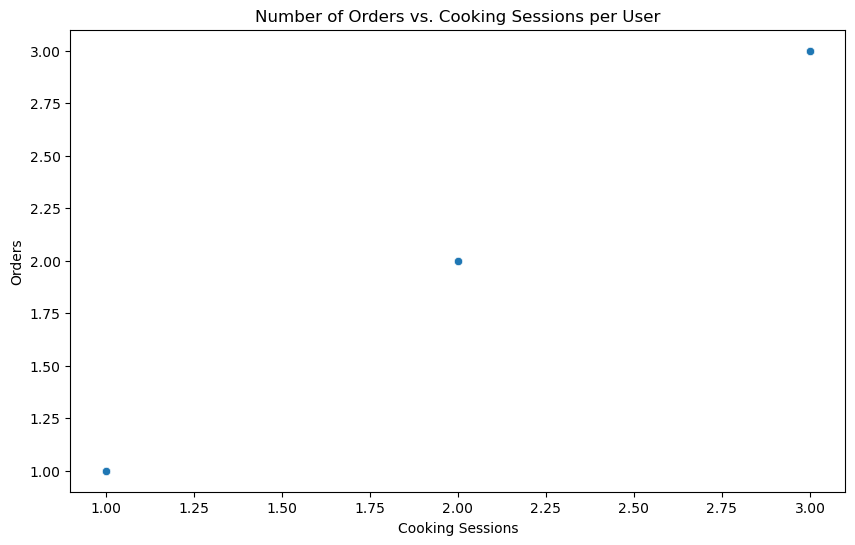

In [9]:
# Visualization 1: Number of Orders vs. Cooking Sessions for each user
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CookingSessions csv.Session ID', y='OrderDetails csv.Order ID', data=session_order_count)
plt.title('Number of Orders vs. Cooking Sessions per User')
plt.xlabel('Cooking Sessions')
plt.ylabel('Orders')
plt.show()

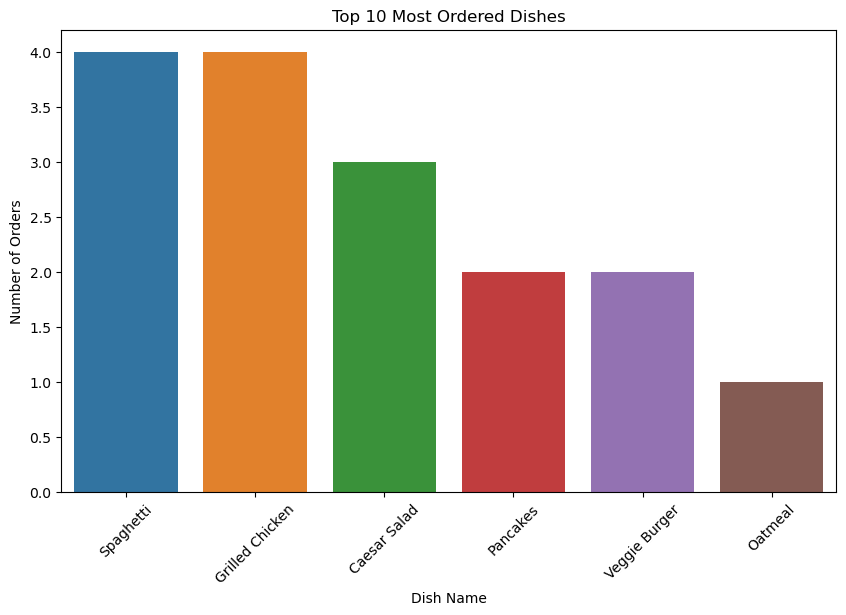

In [10]:
# Visualization 2: Most Ordered Dishes
popular_dishes = data['OrderDetails csv.Dish Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title('Top 10 Most Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

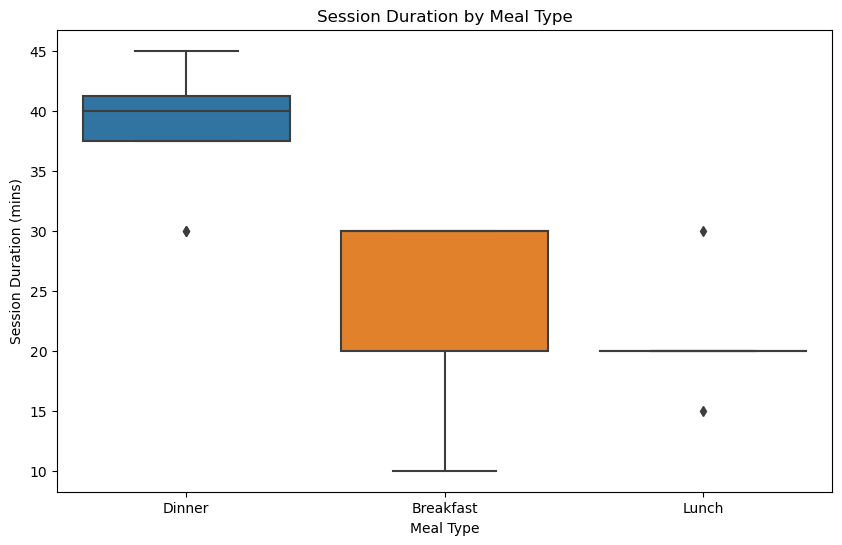

In [11]:
# Visualization 3: Session Duration by Meal Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CookingSessions csv.Meal Type', y='Session Duration (mins)', data=data)
plt.title('Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Duration (mins)')
plt.show()

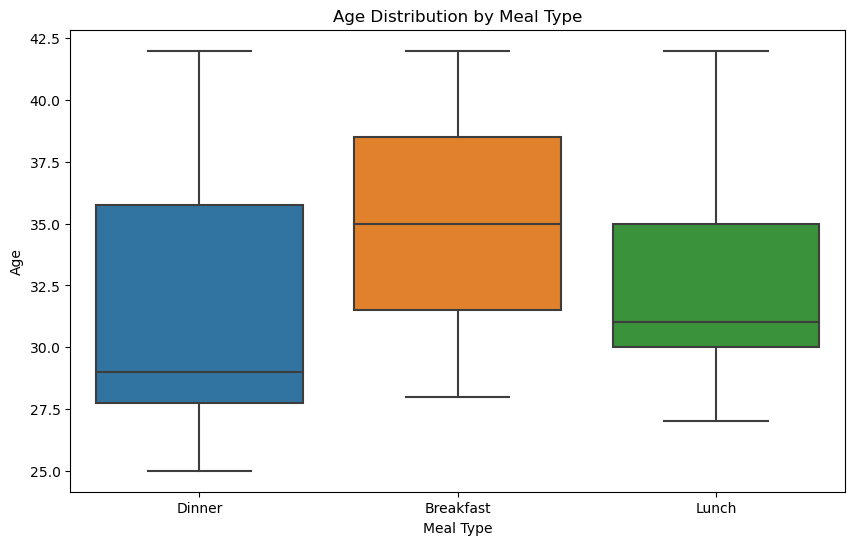

In [12]:
# Visualization 4: Age Distribution by Meal Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CookingSessions csv.Meal Type', y='Age', data=data)
plt.title('Age Distribution by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Age')
plt.show()

In [13]:
# Insights and Recommendations:
# Summary of insights based on the data
insights = """
Key Insights:
1. A positive correlation exists between cooking sessions and orders. Users who engage more with cooking sessions tend to place more orders.
2. 'Spaghetti' and 'Grilled Chicken' are the most ordered dishes, indicating a preference for these meals.
3. Younger users (age 25-35) are more likely to engage in cooking sessions and order frequently.
4. The session duration for dinner meals tends to be longer than for lunch or breakfast.
5. Some users have inconsistent behavior, with canceled sessions (e.g., Charlie Lee) affecting overall engagement.
"""

# Business Recommendations:
recommendations = """
Business Recommendations:
1. Increase promotion of popular dishes like 'Spaghetti' and 'Grilled Chicken' through targeted marketing campaigns.
2. Offer loyalty programs to users with higher engagement in both cooking and ordering to boost repeat business.
3. Focus on younger demographics (25-35 years old) by introducing meal kits and time-saving options for busy professionals.
4. Address cancellation issues by improving the consistency and reliability of cooking sessions and delivery services.
5. Offer special discounts for dinner meals, as they tend to have longer session durations and potentially higher engagement.
"""

In [14]:
# Print insights and recommendations
print(insights)
print(recommendations)


Key Insights:
1. A positive correlation exists between cooking sessions and orders. Users who engage more with cooking sessions tend to place more orders.
2. 'Spaghetti' and 'Grilled Chicken' are the most ordered dishes, indicating a preference for these meals.
3. Younger users (age 25-35) are more likely to engage in cooking sessions and order frequently.
4. The session duration for dinner meals tends to be longer than for lunch or breakfast.
5. Some users have inconsistent behavior, with canceled sessions (e.g., Charlie Lee) affecting overall engagement.


Business Recommendations:
1. Increase promotion of popular dishes like 'Spaghetti' and 'Grilled Chicken' through targeted marketing campaigns.
2. Offer loyalty programs to users with higher engagement in both cooking and ordering to boost repeat business.
3. Focus on younger demographics (25-35 years old) by introducing meal kits and time-saving options for busy professionals.
4. Address cancellation issues by improving the consis